In [1]:
%matplotlib inline

import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict

In [2]:
sys.path.append('/Users/Cava/Desktop/University/Data Science & Business Informatics/Data Mining/Advanced Topics and Applications/Practice/lore/')

In [3]:
from util import record2str, neuclidean
from datamanager import prepare_adult_dataset, prepare_dataset
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Data Preparation

In [4]:
class_name = 'Occupancy'
df = pd.read_csv(r'/Users/Cava/Desktop/University/Data Science & Business Informatics/Data Mining/Advanced Topics and Applications/Project/data/whole.csv')
columns2remove = ['Unnamed: 0', 'HumidityRatio']
df.drop(columns2remove, inplace=True, axis=1)
df['date'] =  pd.to_datetime(df['date'], format = '%Y-%m-%d %H:%M:%S')
df.sort_values('date', inplace = True)
df.reset_index(inplace = True, drop = True)
df.set_index('date', inplace=True)
df

,Temperature,Humidity,Light,CO2,Occupancy
date,,,,,
2015-02-02 14:19:00,23.7000,26.2720,585.200000,749.200000,1
2015-02-02 14:19:59,23.7180,26.2900,578.400000,760.400000,1
2015-02-02 14:21:00,23.7300,26.2300,572.666667,769.666667,1
2015-02-02 14:22:00,23.7225,26.1250,493.750000,774.750000,1
2015-02-02 14:23:00,23.7540,26.2000,488.600000,779.000000,1
...,...,...,...,...,...
2015-02-18 09:15:00,20.8150,27.7175,429.750000,1505.250000,1
2015-02-18 09:16:00,20.8650,27.7450,423.500000,1514.500000,1
2015-02-18 09:16:59,20.8900,27.7450,423.500000,1521.500000,1


In [5]:
class_name = 'Occupancy'
train = pd.read_csv(r'/Users/Cava/Desktop/University/Data Science & Business Informatics/Data Mining/Advanced Topics and Applications/Project/data/training.csv')
columns2remove = ['Unnamed: 0', 'HumidityRatio']
train.drop(columns2remove, inplace=True, axis=1)
train['date'] =  pd.to_datetime(train['date'], format = '%Y-%m-%d %H:%M:%S')
train.sort_values('date', inplace = True)
train.reset_index(inplace = True, drop = True)
train.set_index('date', inplace=True)
train

,Temperature,Humidity,Light,CO2,Occupancy
date,,,,,
2015-02-02 14:19:00,23.7000,26.2720,585.200000,749.200000,1
2015-02-02 14:19:59,23.7180,26.2900,578.400000,760.400000,1
2015-02-02 14:21:00,23.7300,26.2300,572.666667,769.666667,1
2015-02-02 14:22:00,23.7225,26.1250,493.750000,774.750000,1
2015-02-02 14:23:00,23.7540,26.2000,488.600000,779.000000,1
...,...,...,...,...,...
2015-02-18 09:14:00,20.8150,27.4175,430.750000,1511.750000,1
2015-02-18 09:16:00,20.8650,27.7450,423.500000,1514.500000,1
2015-02-18 09:16:59,20.8900,27.7450,423.500000,1521.500000,1


In [6]:
class_name = 'Occupancy'
test = pd.read_csv(r'/Users/Cava/Desktop/University/Data Science & Business Informatics/Data Mining/Advanced Topics and Applications/Project/data/test.csv')
columns2remove = ['Unnamed: 0', 'HumidityRatio']
test.drop(columns2remove, inplace=True, axis=1)
test['date'] =  pd.to_datetime(test['date'], format = '%Y-%m-%d %H:%M:%S')
test.sort_values('date', inplace = True)
test.reset_index(inplace = True, drop = True)
test.set_index('date', inplace=True)
test

,Temperature,Humidity,Light,CO2,Occupancy
date,,,,,
2015-02-02 14:19:00,23.700,26.2720,585.200000,749.200000,1
2015-02-02 14:19:59,23.718,26.2900,578.400000,760.400000,1
2015-02-02 14:21:00,23.730,26.2300,572.666667,769.666667,1
2015-02-02 14:23:00,23.754,26.2000,488.600000,779.000000,1
2015-02-02 14:25:00,23.730,26.2900,536.333333,798.000000,1
...,...,...,...,...,...
2015-02-18 09:11:59,20.790,27.0300,419.000000,1488.000000,1
2015-02-18 09:15:00,20.815,27.7175,429.750000,1505.250000,1
2015-02-18 09:16:00,20.865,27.7450,423.500000,1514.500000,1


In [7]:
attributes = [c for c in df.columns if c != class_name]

In [8]:
X_train = train[attributes].values

y_train = train[class_name].values

X_train.shape 

(14391, 4)

In [9]:
X_test = test[attributes].values

y_test = test[class_name].values

X_test.shape

(6168, 4)

In [10]:
X = df[attributes].values
y = df[class_name].values
X.shape

(20560, 4)

In [11]:
scaler = MinMaxScaler()
X_tr_sc = scaler.fit_transform(X_train)
df_tr_sc = pd.DataFrame(X_tr_sc)
X_te_sc = scaler.fit_transform(X_test)
df_te_sc = pd.DataFrame(X_te_sc)
X_sc = scaler.fit_transform(X)
df_sc = pd.DataFrame(X_sc)

# Classification

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
bb = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=3, min_weight_fraction_leaf=0.0, max_features='auto', random_state=0)
bb.fit(X_train, y_train)

y_pred = bb.predict(X_test)

In [14]:
def bb_predict(X):
    return bb.predict(X)

def bb_predict_proba(X):
    return bb.predict_proba(X)

In [15]:
y_pred = bb_predict(X_test)

print('Accuracy %.3f' % accuracy_score(y_test, y_pred))
print('F1-measure %.3f' % f1_score(y_test, y_pred))

Accuracy 0.994
F1-measure 0.986


# Explanation

In [16]:
from skater.model import InMemoryModel
from skater.core.explanations import Interpretation

from skater.core.global_interpretation.partial_dependence import PartialDependence

In [17]:
interpreter = Interpretation()
interpreter.load_data(X_train, feature_names=attributes)

[30/30] grid cells ████████████████████ Time elapsed: 0 seconds

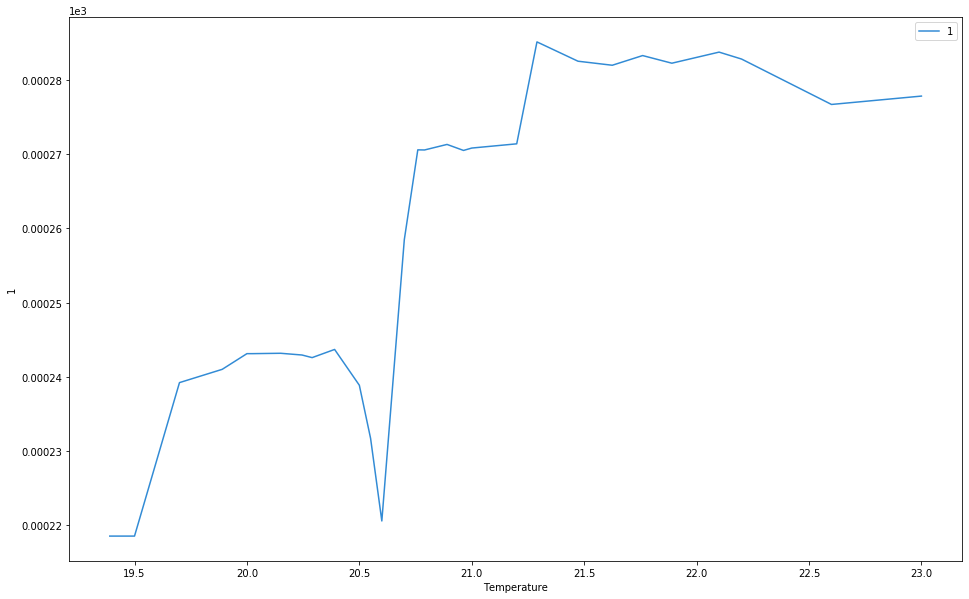

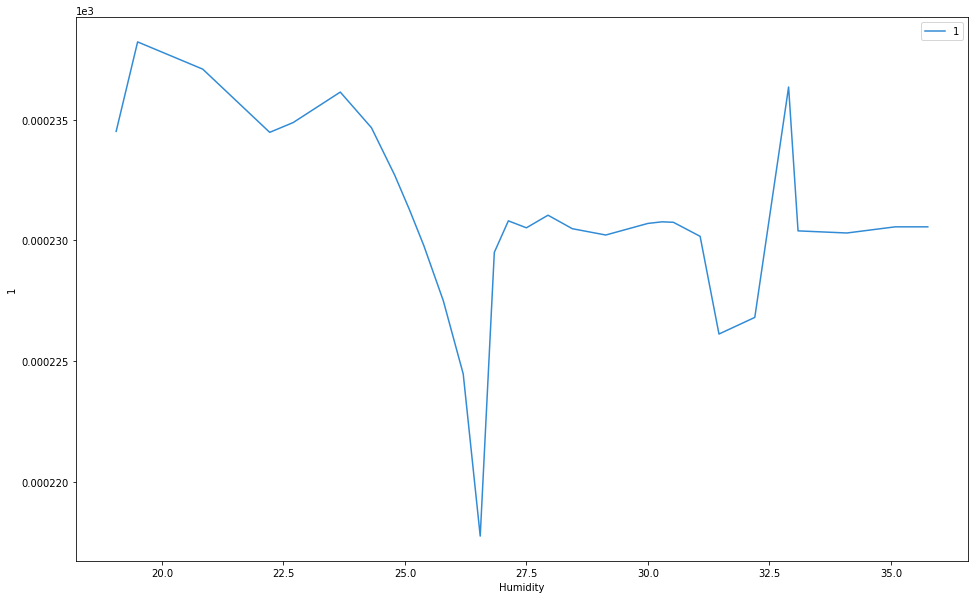

In [18]:
model = InMemoryModel(bb_predict_proba, examples=X_test)
interpreter.partial_dependence.plot_partial_dependence([attributes[0], attributes[1]],
                                                       model, n_samples=100, n_jobs=1)
plt.show()

[30/30] grid cells ████████████████████ Time elapsed: 0 seconds

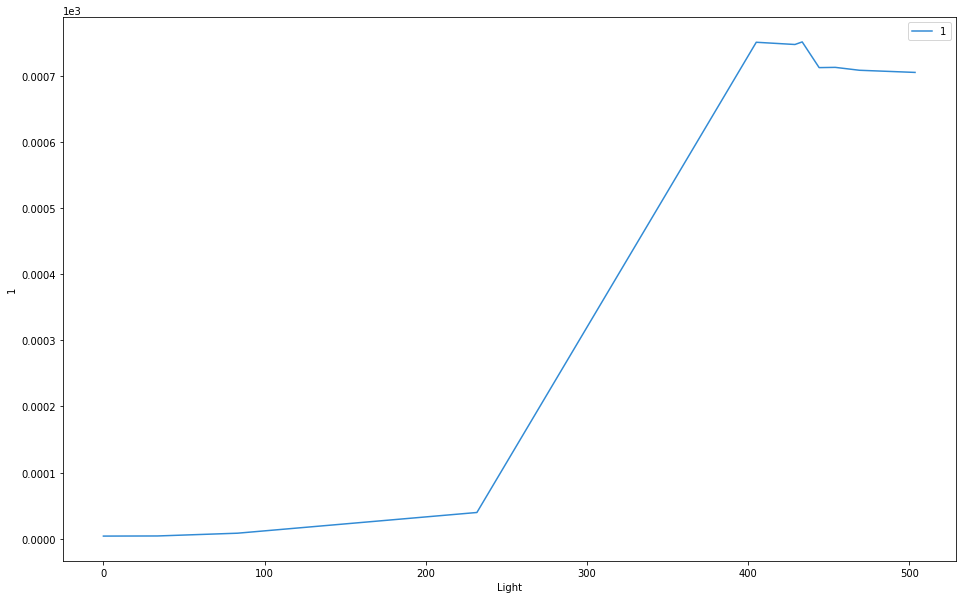

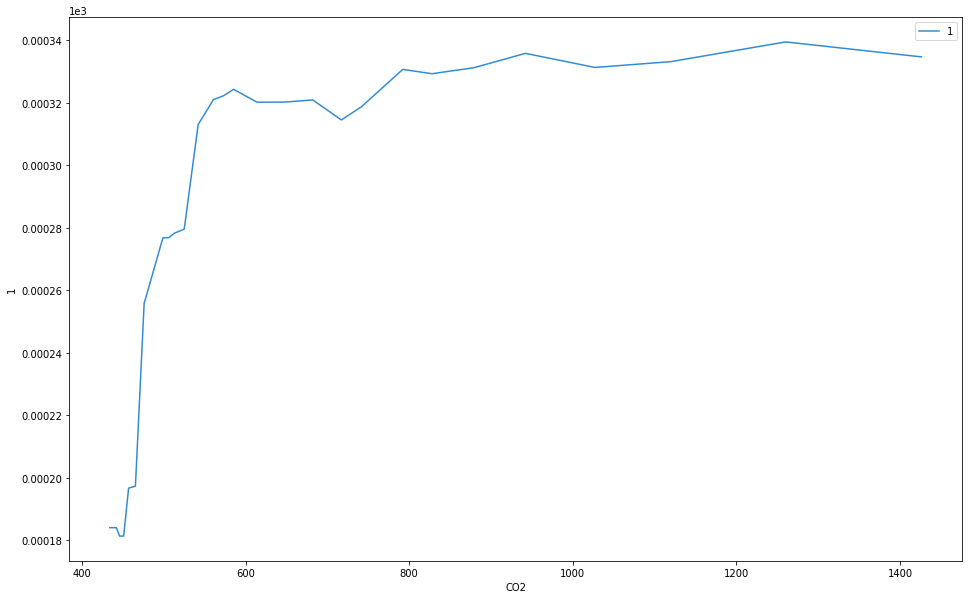

In [19]:
model = InMemoryModel(bb_predict_proba, examples=X_test)
interpreter.partial_dependence.plot_partial_dependence([attributes[2], attributes[3]],
                                                       model, n_samples=100, n_jobs=1)
plt.show()

## Local Explanations

### Select a record to explain

In [20]:
from random import seed
from random import randint
# seed random number generator
seed(1)
# generate some integers
i2e = randint(0, len(X_test)-1)
print(i2e)

x = X_test[i2e]
x

1100


array([  22.1 ,   26.65,  469.  , 1050.  ])

In [21]:
record2str(x, attributes, attributes)

'{ Temperature = 22.1, Humidity = 26.65, Light = 469.0, CO2 = 1050.0 }'

In [22]:
class_values = [0,1]

In [23]:
bb_outcome = bb_predict(x.reshape(1, -1))[0]
bb_outcome_str = class_values[bb_outcome]

print('bb(x) = { %s }' % bb_outcome_str)
print('')

bb(x) = { 1 }



### LIME

https://github.com/marcotcr/lime

In [24]:
from lime.lime_tabular import LimeTabularExplainer

In [48]:
lime_explainer = LimeTabularExplainer(X_test, feature_names=attributes,
                                      class_names=['0','1'], discretize_continuous=False)

In [49]:
exp = lime_explainer.explain_instance(x, bb_predict_proba)

In [50]:
exp.local_exp

{1: [(2, 0.32283075891515073),
  (3, 0.05651135611046916),
  (0, -0.020425512444790093),
  (1, 0.0004371360950037476)]}

In [51]:
exp.show_in_notebook()

# SHAP

In [29]:
import shap

shap.initjs()

In [30]:
f = lambda x: bb_predict_proba(x)[:, 1]
med = np.median(X_test, axis=0).reshape((1, X_test.shape[1]))

shap_explainer = shap.KernelExplainer(f, med)

In [31]:
shap_values_single = shap_explainer.shap_values(x, nsamples=1000)

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


In [32]:
shap.force_plot(shap_explainer.expected_value, shap_values_single, features=x, feature_names=attributes)

In [46]:
shap_values = shap_explainer.shap_values(X_test, nsamples=1000)

In [47]:
shap.force_plot(shap_explainer.expected_value, shap_values, X_test, feature_names=attributes)

### LORE

In [35]:
from lorem import LOREM

In [36]:
def get_features_map(feature_names, real_feature_names):
    features_map = defaultdict(dict)
    i = 0
    j = 0

    while i < len(feature_names) and j < len(real_feature_names):
        if feature_names[i] == real_feature_names[j]:
            features_map[j][feature_names[i]] = j
            i += 1
            j += 1
        elif feature_names[i].startswith(real_feature_names[j]):
            features_map[j][feature_names[i]] = j
            i += 1
        else:
            j += 1
    return features_map

In [37]:
features_map = get_features_map(attributes, attributes)

In [38]:
lore_explainer = LOREM(X_test, bb_predict, attributes, class_name, class_values, attributes, features_map,
                       neigh_type='geneticp', categorical_use_prob=True, continuous_fun_estimation=False, 
                       size=1000, ocr=0.1, random_state=42, ngen=10, bb_predict_proba=bb_predict_proba, 
                       verbose=True)

calculating feature values


In [39]:
exp = lore_explainer.explain_instance(x, samples=1000, use_weights=True, metric=neuclidean)

generating neighborhood - geneticp
gen	nevals	avg     	min     	max     
0  	500   	0.496654	0.496654	0.496654
1  	428   	0.617228	0.412523	0.993307
2  	425   	0.746702	0.382846	0.993307
3  	431   	0.837616	0.336088	0.993307
4  	443   	0.88652 	0.425943	0.993307
5  	412   	0.886354	0.122211	0.993307
6  	430   	0.879225	0.350089	0.993307
7  	426   	0.868141	0.47729 	0.993307
8  	425   	0.893407	0.483219	0.993307
9  	430   	0.870639	0.408402	0.993307
10 	434   	0.884131	0.448803	0.993307
gen	nevals	avg	min	max
0  	500   	0.5	0.5	0.5
1  	421   	0.615188	0.394173	0.991742
2  	429   	0.799557	0.491723	0.991862
3  	433   	0.936486	0.49031 	0.991893
4  	433   	0.958499	0.492774	0.991985
5  	429   	0.955685	0.493021	0.991915
6  	428   	0.966732	0.493784	0.991961
7  	409   	0.949856	0.492013	0.991974
8  	424   	0.959006	0.49136 	0.99196 
9  	432   	0.958261	0.491175	0.992146
10 	431   	0.965708	0.493285	0.992181
synthetic neighborhood class counts {0: 740, 1: 460}
learning local decision tree
r

In [40]:
print(exp)

r = { Light > 350.00, CO2 > 480.50 } --> { Occupancy: 1 }
c = { { Light <= 290.36 } }


In [54]:
x1 = x.copy()
x1[attributes.index('Light')] = 290

print('x = %s' % record2str(x, attributes, attributes))
print('')
print('x = %s' % record2str(x1, attributes, attributes))
print('')

x = { Temperature = 22.1, Humidity = 26.65, Light = 469.0, CO2 = 1050.0 }

x = { Temperature = 22.1, Humidity = 26.65, Light = 290.0, CO2 = 1050.0 }



In [53]:
bb_outcome = bb_predict(x1.reshape(1, -1))[0]
bb_outcome_str = class_values[bb_outcome]

print('bb(x) = { %s }' % bb_outcome_str)
print('')

bb(x) = { 0 }

